# Homework 2:


# Speed Control Fines:

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
drive.mount('/content/drive')

In [ ]:
#Reads in the csv file
speed_fines = pd.read_csv('/content/drive/My Drive/31-M29_HW2_2022_Speed_Control_Fines_Cologne.csv', delimiter = ';', decimal = ',', encoding = 'ISO-8859-1')

# Clean the Data:

In [4]:
speed_fines['Speed'] = speed_fines['Speed'].replace('FFF', np.nan)
speed_fines['Limit_Exceeded_By'] = speed_fines['Limit_Exceeded_By'].astype(str)
speed_fines['Limit_Exceeded_By'] = speed_fines['Limit_Exceeded_By'].replace('   ', np.nan)
speed_fines['Limit_Exceeded_By'] = speed_fines['Limit_Exceeded_By'].replace('nan', np.nan)

# 1. Non-graphical Representation: Number of fines per year

In [5]:
# Group the data by year and count the number of records for each year
fines_per_year = speed_fines.groupby('Year').count()
fines_per_year['Number of fines per year'] = fines_per_year['Date']

# Print the resulting Series
fines_per_year[['Number of fines per year']]

,Number of fines per year
Year,
2017,551096
2018,609615
2019,564405
2020,598161
2021,609034


# Describtion:

This representation allows us to see if the number of fines is increasing or decreasing over the years and identify  any patterns or trends that may exist. For Example, we could see that the number of fines tends to be higher during certain years, which could be due to factors such as increased traffic or stricter enforcement of speed limits. Overall this representation provides valuable insights into the trends in the number of speed control fines issued in cologne, which can help identify sudden increases or decreases in the number of fines in a particular year.

# 2. Non-graphical Representation: Number of fines issued per vehicle type:

In [6]:
# Group the data by vehicle type and count the number of records for each year
fines_per_vehicle = speed_fines.groupby('Vehicle_Type').count()
fines_per_vehicle['Number of fines issued per vehicle type'] = fines_per_vehicle['Date']

# Print the resulting Series
fines_per_vehicle[['Number of fines issued per vehicle type']]

,Number of fines issued per vehicle type
Vehicle_Type,
01a,215
02a,2
03a,11
04a,2890713
05a,6173
06a,10602
06b,5927
06c,12641
06d,189


# Description:

The number of fines issued per vehicle type is a fair representation of the data because it accurately shows the distribution of fines among different types of vehicles. This representation allows us to see which types of vehicles are more likely to recieve fines for speeding and identify and patterns or trends that may exist. by looking at this representation, we can also identify any potential biases in the enforcement of speed limits. for example, if one type  of vehicle os consistently revieving more fines than others, it could be to unfair targeting or due to behaviour of this vehicle group.

# 3. Non-graphical Representation: Average speed limit exceeded by per year

In [7]:
# Convert the "Limit_Exceeded_By" column to integers, ignoring the NaN values
speed_fines['Limit_Exceeded_By'] = pd.to_numeric(speed_fines['Limit_Exceeded_By'], errors='coerce')

# Group the data by year and apply the np.mean function to the "Limit_Exceeded_By" column
avg_exceeded_by_per_year = speed_fines.groupby('Year')['Limit_Exceeded_By'].apply(np.mean).reset_index('Year')
avg_exceeded_by_per_year.rename(columns = {'Limit_Exceeded_By' : 'Average speed limit exceeded by per year'}, inplace = True)

# Print the resulting Series
avg_exceeded_by_per_year[['Year', 'Average speed limit exceeded by per year']]

,Year,Average speed limit exceeded by per year
0,2017,11.074706
1,2018,10.840922
2,2019,10.387268
3,2020,10.350919
4,2021,9.995810


# Description:

This representation of the data shows the trend in the amount by which the speed limit was exceeded over time. It allows us to see if the average amount of speed limit exceeded is increasing or decreasing over the years and identify any patterns or trends that may exist. This representation can be useful for policymakers to see if their developt strategies reduce the average amount of speed limits exceeded, which will help to understand if their strategies are working.

# 1. Graphical representation: boxplot of the distribution of speed limit exceeded by each time of day

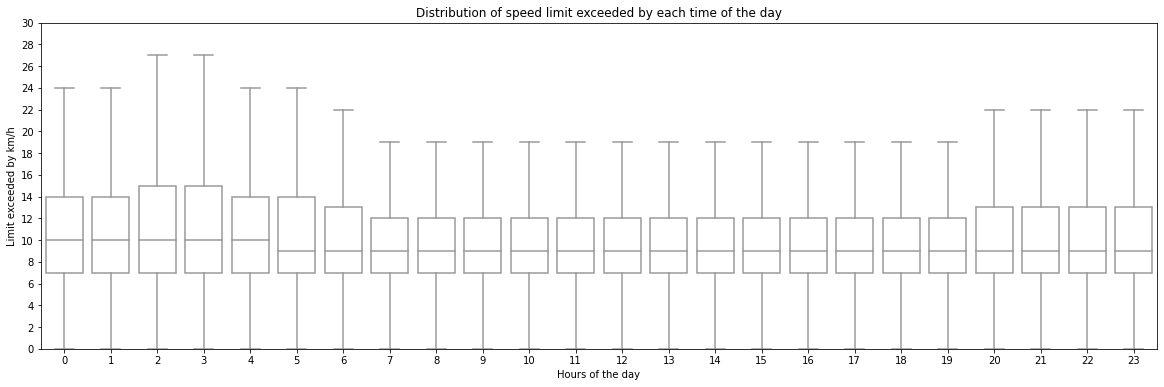

In [8]:
# Define a function to convert the time column to the HH:MM:SS format
def convert_time(time):
    # Convert the time to a string
    time_str = str(time)

    # Pad the time with zeros if necessary
    time_str = time_str.zfill(6)

    # Split the time into hours, minutes, and seconds
    hours = time_str[:2]
    minutes = time_str[2:4]
    seconds = time_str[4:]

    # Return the time in the HH:MM:SS format
    return f"{hours}:{minutes}:{seconds}"

# Convert the time column to the HH:MM:SS format
speed_fines["Time"] = speed_fines["Time"].apply(convert_time)

# Extract the hour from the 'Time' column and create a new 'Hour' column
speed_fines['Hour'] = speed_fines['Time'].str.slice(0, 2)

# Convert the 'Hour' column to integer format
speed_fines['Hour'] = speed_fines['Hour'].astype(int)


# Plot the boxplot using the 'Limit Exceeded By' column as the y-axis and the 'Hour' column as the x-axis
plt.figure(figsize = (20,6))
bp = sns.boxplot(x='Hour', y='Limit_Exceeded_By', data=speed_fines, fliersize=0, color = 'white')
bp.set_ylim(0,30)
bp.set_yticks(range(0, 32, 2))
plt.title('Distribution of speed limit exceeded by each time of the day')
plt.ylabel('Limit exceeded by km/h')
plt.xlabel('Hours of the day');


# Description:

This boxplot can provide insights into when speeding violations are most common and whether there is a relationship between the time of day and the extent to which the speed limit is exceeded. This can be relevant for understanding when and where speeding is more likely to occur. The bosplot allows for easy comparison of the distribution of the data across different time periods and can help identify patterns or trends in the data. It can help to identify times of the day, where speeding is more common (For Example: At night, rush hours, etc.). This could then be used to start targeted enforcment efforts.

# 2. Graphical representation: bar chart for comparison of the fines per month for the months from 2017 and 2018

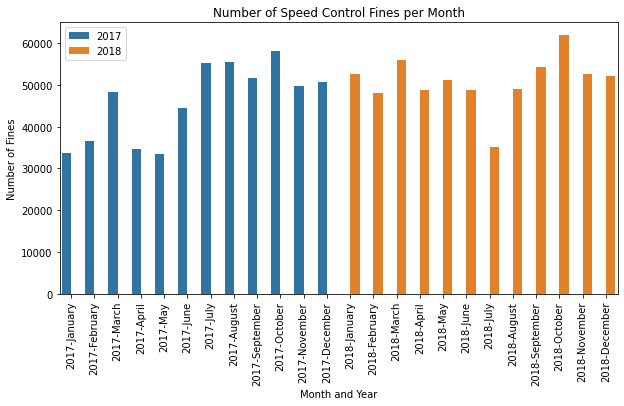

In [9]:
# Convert the integers to month names
speed_fines["Month"] = speed_fines["Month"].apply(lambda x: calendar.month_name[x])

# Group speed_fines by Year and Month, select only 2017 and 2018
fines_by_month = speed_fines.groupby(["Year", "Month"], sort = False).size()
fines_by_month_2017_2018 =  fines_by_month.loc[(fines_by_month.index.get_level_values(0) == 2017) | (fines_by_month.index.get_level_values(0) == 2018)]

# Extract the month and year values for the x-axis
x = [f"{year}-{month}" for year, month in fines_by_month_2017_2018.index]

# Extract the fines values for the y-axis
y = fines_by_month_2017_2018.values

# Create a new variable to specify the groups for the bars
groups = ['2017'] * 12 + ['2018'] * 12

# Create the bar plot
plt.figure(figsize = (10,5))
sns.barplot(x = x, y = y, hue = groups)

# Add axis labels and a title
plt.xlabel("Month and Year")
plt.ylabel("Number of Fines")
plt.title("Number of Speed Control Fines per Month")

# Rotate the x-axis labels
plt.xticks(rotation = 90);

# Description:

The bar chart displays the number of fines issued over the course of two years, with the months of the year displayed on the x-axis and the number of fines on the y-axis. Each month is represented by a seperate bar, with data for both 2017 and 2018 included on the chart and distinguished by different colors. From this representation, it is possible to see the number of fines issued in each month for both years, allowing for a deatailed comparison of the data over time. This information may be useful for understanding the seasonal trends in the issuance of fines, identifying and significant chnages in the data from one year to the next, and potentially identifying factors that may have contributed to any changes in the number of fines.

# 3. Graphical representation: Number of fines over the years for the location 40 as a scatterplot


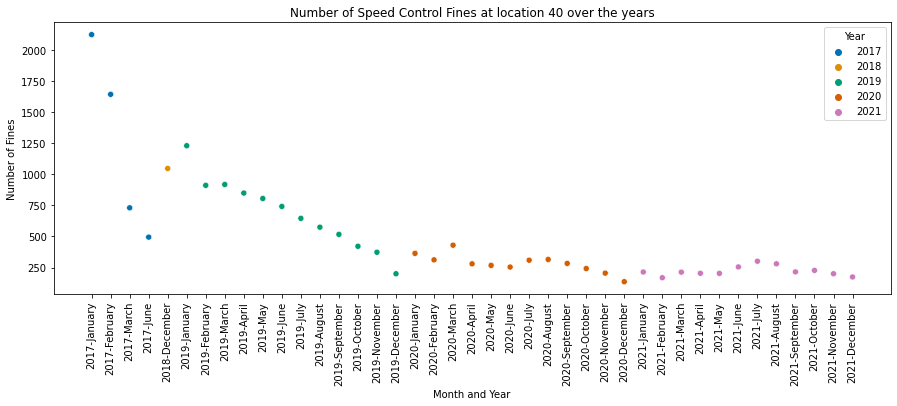

In [10]:
# Groub speed_fines by location 40 and get number of fines per year
fines_location_40 = speed_fines[speed_fines['Location'] == 40]
fines_location_40_per_year = fines_location_40.groupby(['Year', 'Month'], sort = False).size()

# Extract the month and year values for the x-axis
x = [f"{year}-{month}" for year, month in fines_location_40_per_year.index]

# Extract the fines values for the y-axis
y = fines_location_40_per_year.values

# Create the line chart plot
plt.figure(figsize= (15,5))
sns.scatterplot(x = x, y = y, data = fines_location_40_per_year, hue = 'Year', palette = 'colorblind')
plt.xlabel("Month and Year")
plt.ylabel("Number of Fines")
plt.title("Number of Speed Control Fines at location 40 over the years")
plt.xticks(rotation = 90);

# Description:

This scatterplot can be used to visualize the trend in the number of fines at location 40 from 2017 to 2021. This representation allows you to see how the number of fines at that location has changed over the years and identify any patterns or trends in the data. The insights derived from this representation can be relevant for understanding the effectiveness of speed control measures at that location and identifying areas where additional efforts may be needed to improve traffic safety.

# 4. Graphical representation: bar chart showing the average speed limit exceeded by for every vehicle type

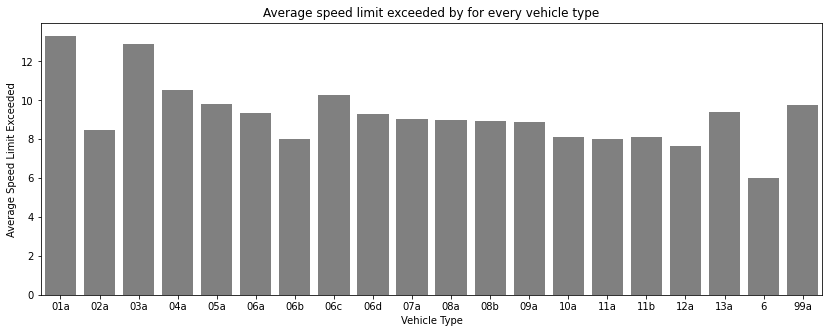

In [11]:
# Calculate the average speed limit exceeded by each vehicle type
vehicle_type_means = speed_fines.groupby("Vehicle_Type")["Limit_Exceeded_By"].mean()

# Create the bar chart
plt.figure(figsize = (14,5))
sns.barplot(x=vehicle_type_means.index, y=vehicle_type_means.values, color = 'grey')

# Add labels to the chart
plt.xlabel("Vehicle Type");
plt.ylabel("Average Speed Limit Exceeded");
plt.title("Average speed limit exceeded by for every vehicle type");


# Description:

This bar chart can provide serveral interesting insights into the speed control fines data. It allows us to compare the average speed limit exceeded by different types of vehicles which can help us understand whether certain types of vehicles are more likely to be involved in speeding incidents. For example, if the chart showed us that trucks are more likely to exceed the speed limit to a higher amount compared to other vehicle types, this could be a signal that more efforts should be focused on reducing speeding by trucks.

# 5. Graphical representation: bar chart showing the number of fines for each department in the years 2018-2021

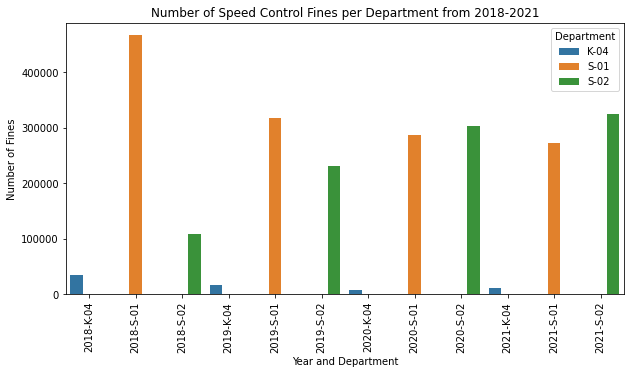

In [12]:
# Group the data by department and count the number of fines in each department
fines_by_department = speed_fines.groupby(['Year', 'Department']).size()

# Extract the month and year values for the x-axis
x = [f"{year}-{department}" for year, department in fines_by_department.index]

# Extract the fines values for the y-axis
y = fines_by_department.values

# Create the bar plot
plt.figure(figsize = (10,5))
sns.barplot(x = x, y = y,hue = fines_by_department.index.get_level_values(1))

# Add axis labels and a title
plt.xlabel("Year and Department")
plt.ylabel("Number of Fines")
plt.title("Number of Speed Control Fines per Department from 2018-2021")

# Rotate the x-axis labels
plt.xticks(rotation = 90);


# Describtion:

This bar plot shows the number of speed control fines issued by each department from 2018 to 2021. The insight that can be gained from this representation is the realtive number of fines issued by each department in each year. For example, if one department consistenly has a higher number of fines than other depaertments, it may suggest that this department has a higher rate of speeding violations. This informartion could be relevant for identifying areas for improvment in traffic safety. Another insight that can be gained from this representation is that, if the number of fines is increasing or decreasing in a particular department or all departments, it could indicate changes in the effectivness of enforcment or in the driving behaviour of the population.

# 6. Graphical Representation: bar chart showing the number of fines for the 10 most finned city plates in 2020 compared to 2021

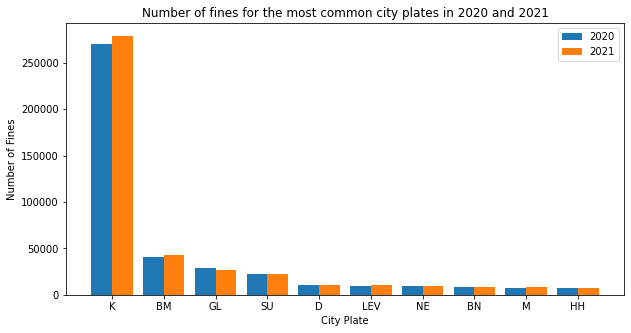

In [17]:
# Get the data for 2020 and 2021
speed_fines_2020 = speed_fines[speed_fines['Year'] == 2020]
speed_fines_2021 = speed_fines[speed_fines['Year'] == 2021]

# Use a regular expression to extract the letters from the License_Plate_City column
speed_fines.loc[speed_fines_2020.index, "License_Plate_City"] = speed_fines_2020["License_Plate_City"].str.extract(r'([a-zA-Z]+)', expand=False)
speed_fines.loc[speed_fines_2021.index, "License_Plate_City"] = speed_fines_2021["License_Plate_City"].str.extract(r'([a-zA-Z]+)', expand=False)

# Get the 10 most common for each year
common_2020 = speed_fines_2020.groupby('License_Plate_City').size().sort_values(ascending = False).head(10)
common_2021 = speed_fines_2021.groupby('License_Plate_City').size().sort_values(ascending = False).head(10)

# Set the figure size
plt.figure(figsize=(10, 5))

# Set the bar width
bar_width = 0.4

# Set the locations for the tick marks on the x-axis
x_pos = [i for i, _ in enumerate(common_2020.index)]

# Plot the bar chart
plt.bar(x_pos, common_2020.values, width=bar_width, label='2020')
plt.bar([i + bar_width for i in x_pos], common_2021.values, width=bar_width, label='2021')

# Add a legend
plt.legend()

# Add a title and labels for the x and y axes
plt.title('Number of fines for the most common city plates in 2020 and 2021')
plt.xlabel('City Plate')
plt.ylabel('Number of Fines')

# Set the locations and labels for the tick marks on the x-axis
plt.xticks([i + bar_width / 2 for i in x_pos], common_2020.index)

# Show the plot
plt.show()

# Description:

This bar chart shows the number of speed control fines issued in 2020 compared to those in 2021 for the 10 most issued 'Licence_City_Plates'. This chart makes it easy to see which city plates have the most fines and helps to understand the distribution of fines across the cities and identify any patterns or trends.
It can also help identify if for example the locals get more used to the speed control measures or other enforcments if u could see a significant dropped from one year to another.